# PENGERTIAN MLP

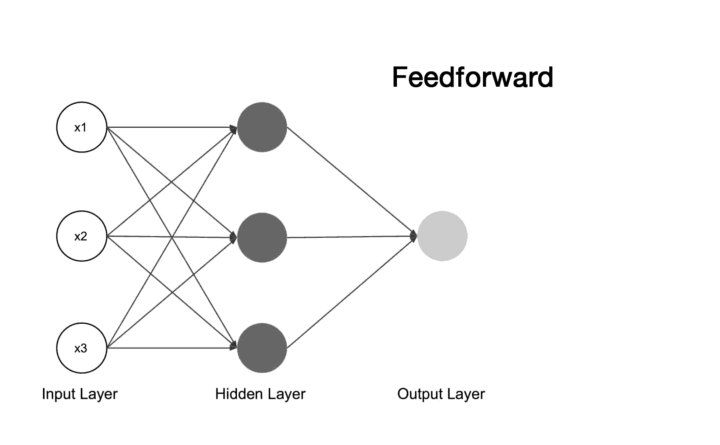



1.   **FEED FORWARD** : Input dimasukkan ke dalam jaringan. Mereka melewati lapisan tersembunyi dan mencapai lapisan output untuk menghasilkan output. Proses ini disebut Feed Forward. Digunakan saat pelatihan dan juga digunakan untuk membuat prediksi nanti ketika jaringan telah selesai pelatihan.


2.   **Calculate the Cost:** Output yang dihasilkan setelah feedforward dibandingkan dengan output yang diinginkan dan kita menghitung seberapa berbeda dari nilai aslinya. Cost pada dasarnya memberi tahu kita betapa berbedanya output kita dari nilai aslinya. Dengan kata lain, ini adalah ukuran kesalahan dalam jaringan kita. Idealnya, kita ingin cost menjadi 0, atau nilai yang sangat dekat dengan 0.


3. **Backpropagation**: Pada langkah ini, kita kembali ke jaringan kita, dan kita memperbarui nilai bobot dan bias di setiap lapisan. Nilai cost memberi tahu kita seberapa banyak untuk memperbarui bobot dan bias (kita menggunakan penurunan gradien di sini). Pembaruan ini pada dasarnya menyetel bobot dan bias sedemikian rupa sehingga output dari jaringan kita menjadi lebih dekat dengan output yang diinginkan, dan akhirnya, cost turun menjadi 0.


# FEED FORWARD

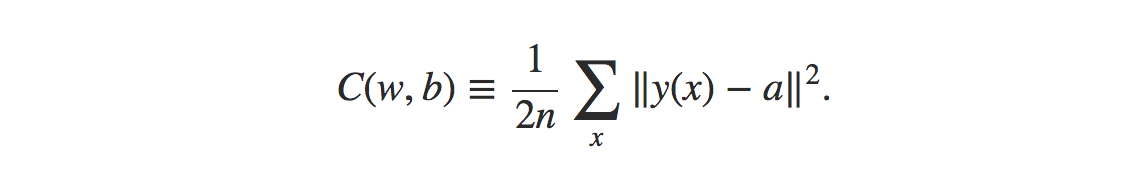

Di mana,

w = bobot yang dikumpulkan dalam jaringan

b = bias

n = jumlah input untuk pelatihan

a = vektor keluaran

x = masukan

v‖ = panjang normal vektor v

# 2. Menghitung Error atau kesalahan

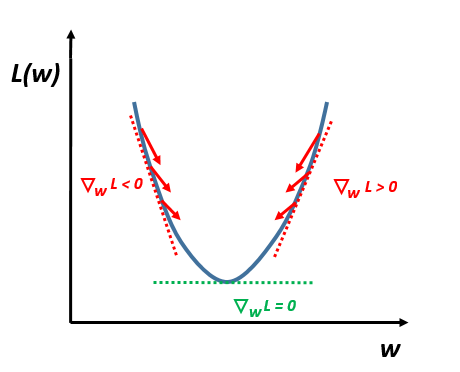

# Menggunakan Fungsi Aktivasi

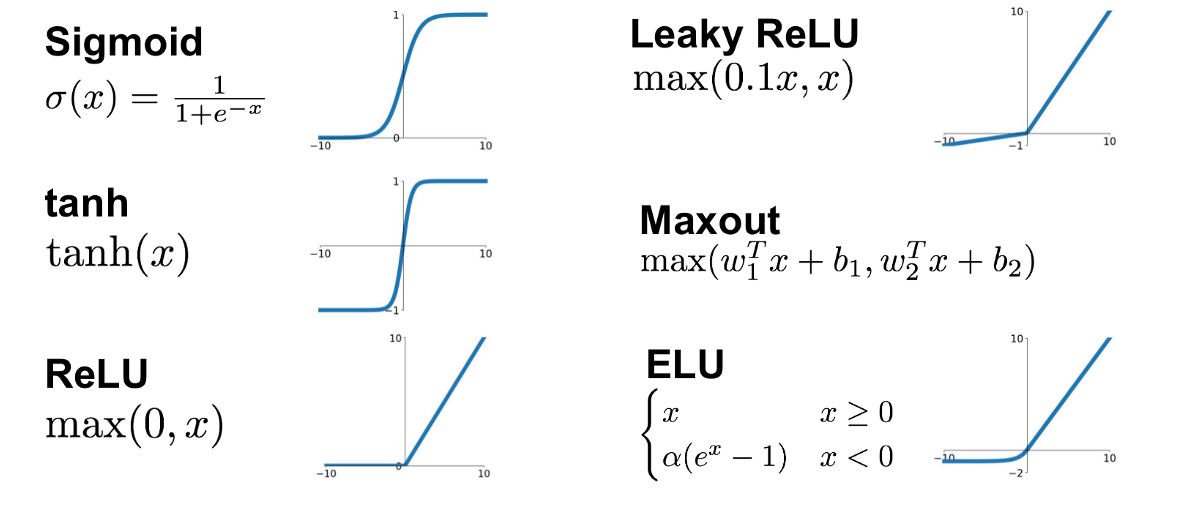

Sigmoid

In [ ]:
x = 0
ativation = {(lambda x: 1/(1 + np.exp(-x)))}
deriv = {(lambda x: x*(1-x))}

Tanh

In [ ]:
activation_tang = {(lambda x: np.tanh(x))}
deriv_tang = {(lambda x: 1-x**2)}

ReLU

In [ ]:
activation_ReLU = {(lambda x: x*(x > 0))}
deriv_ReLU = {(lambda x: 1 * (x>0))}

# Backpropagation

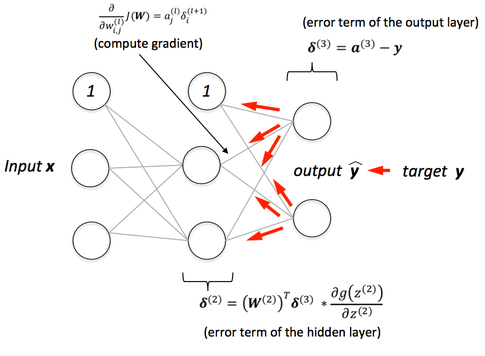

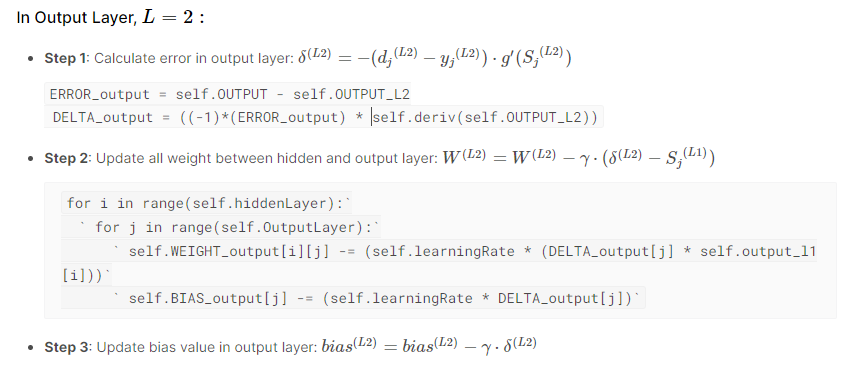

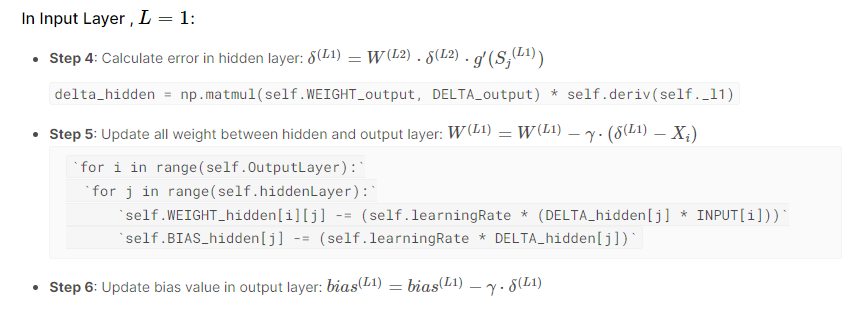

# **1. IMPORT LIBRARY**

In [ ]:
import random
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# **2. DATA UNDERSTANDING**

## **2.1 IMPORT DATA**

In [ ]:
seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_iris
iris_data = load_iris()

## **2.2 Deskripsi Data**

In [ ]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## **2.2 Plotting Data**

### **2.2.1 Plotting Sampel Data**

Text(0.5, 1.0, 'Petal Sample')

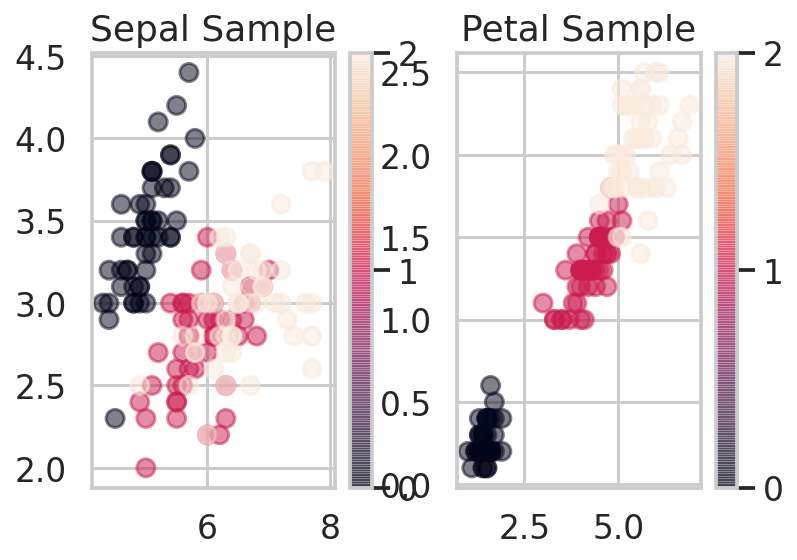

In [ ]:
n_samples, n_features = iris_data.data.shape

plt.subplot(1, 2, 1)
scatter_plot = plt.scatter(iris_data.data[:,0], iris_data.data[:,1], alpha=0.5,
                           c=iris_data.target)
plt.colorbar(ticks=([0, 1, 2]))
plt.title('Sepal Sample')

plt.subplot(1, 2, 2)
scatter_plot_2 = plt.scatter(iris_data.data[:,2], iris_data.data[:,3], alpha=0.5,
                           c=iris_data.target)
plt.colorbar(ticks=([0, 1, 2]))
plt.title('Petal Sample')

### **2.2.2 Plotting Penyebaran Data**

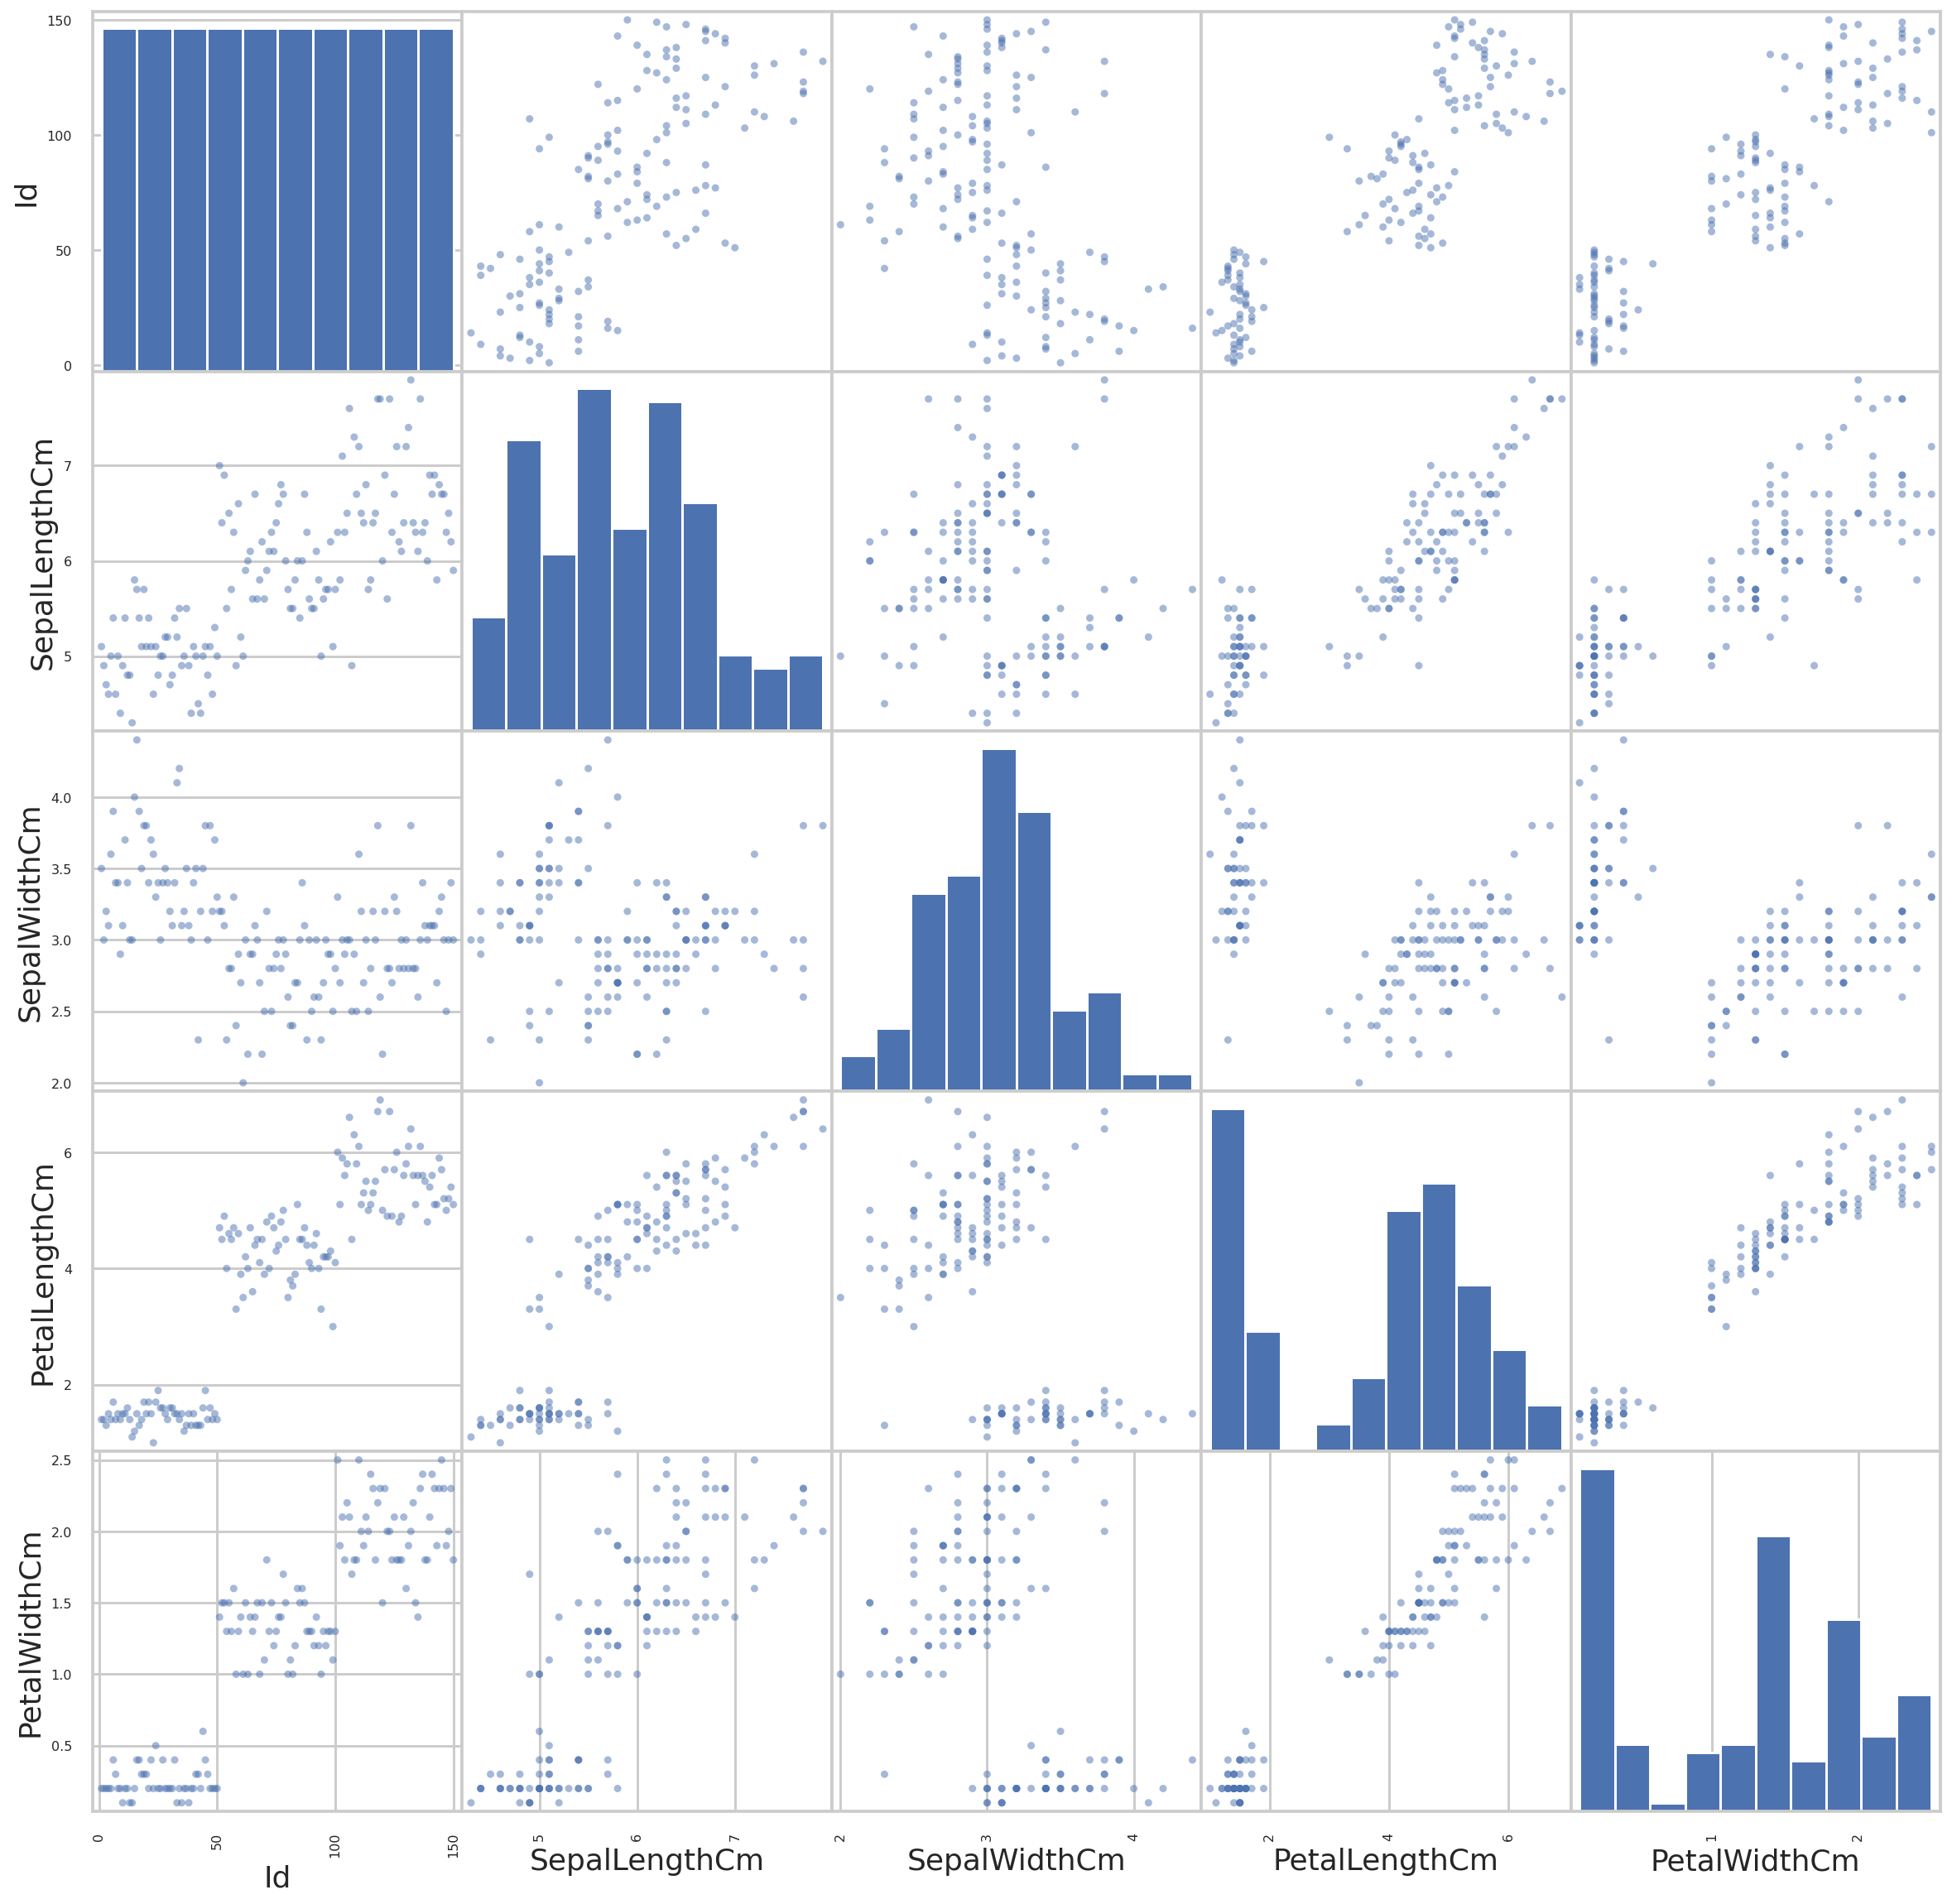

In [ ]:
import pandas
from pandas.plotting import scatter_matrix


dataset = pandas.read_csv('Iris.csv')
scatter_matrix(dataset, alpha=0.5, figsize=(20, 20))
plt.show()

## **2.2.3 Plotting Jumlah Data**

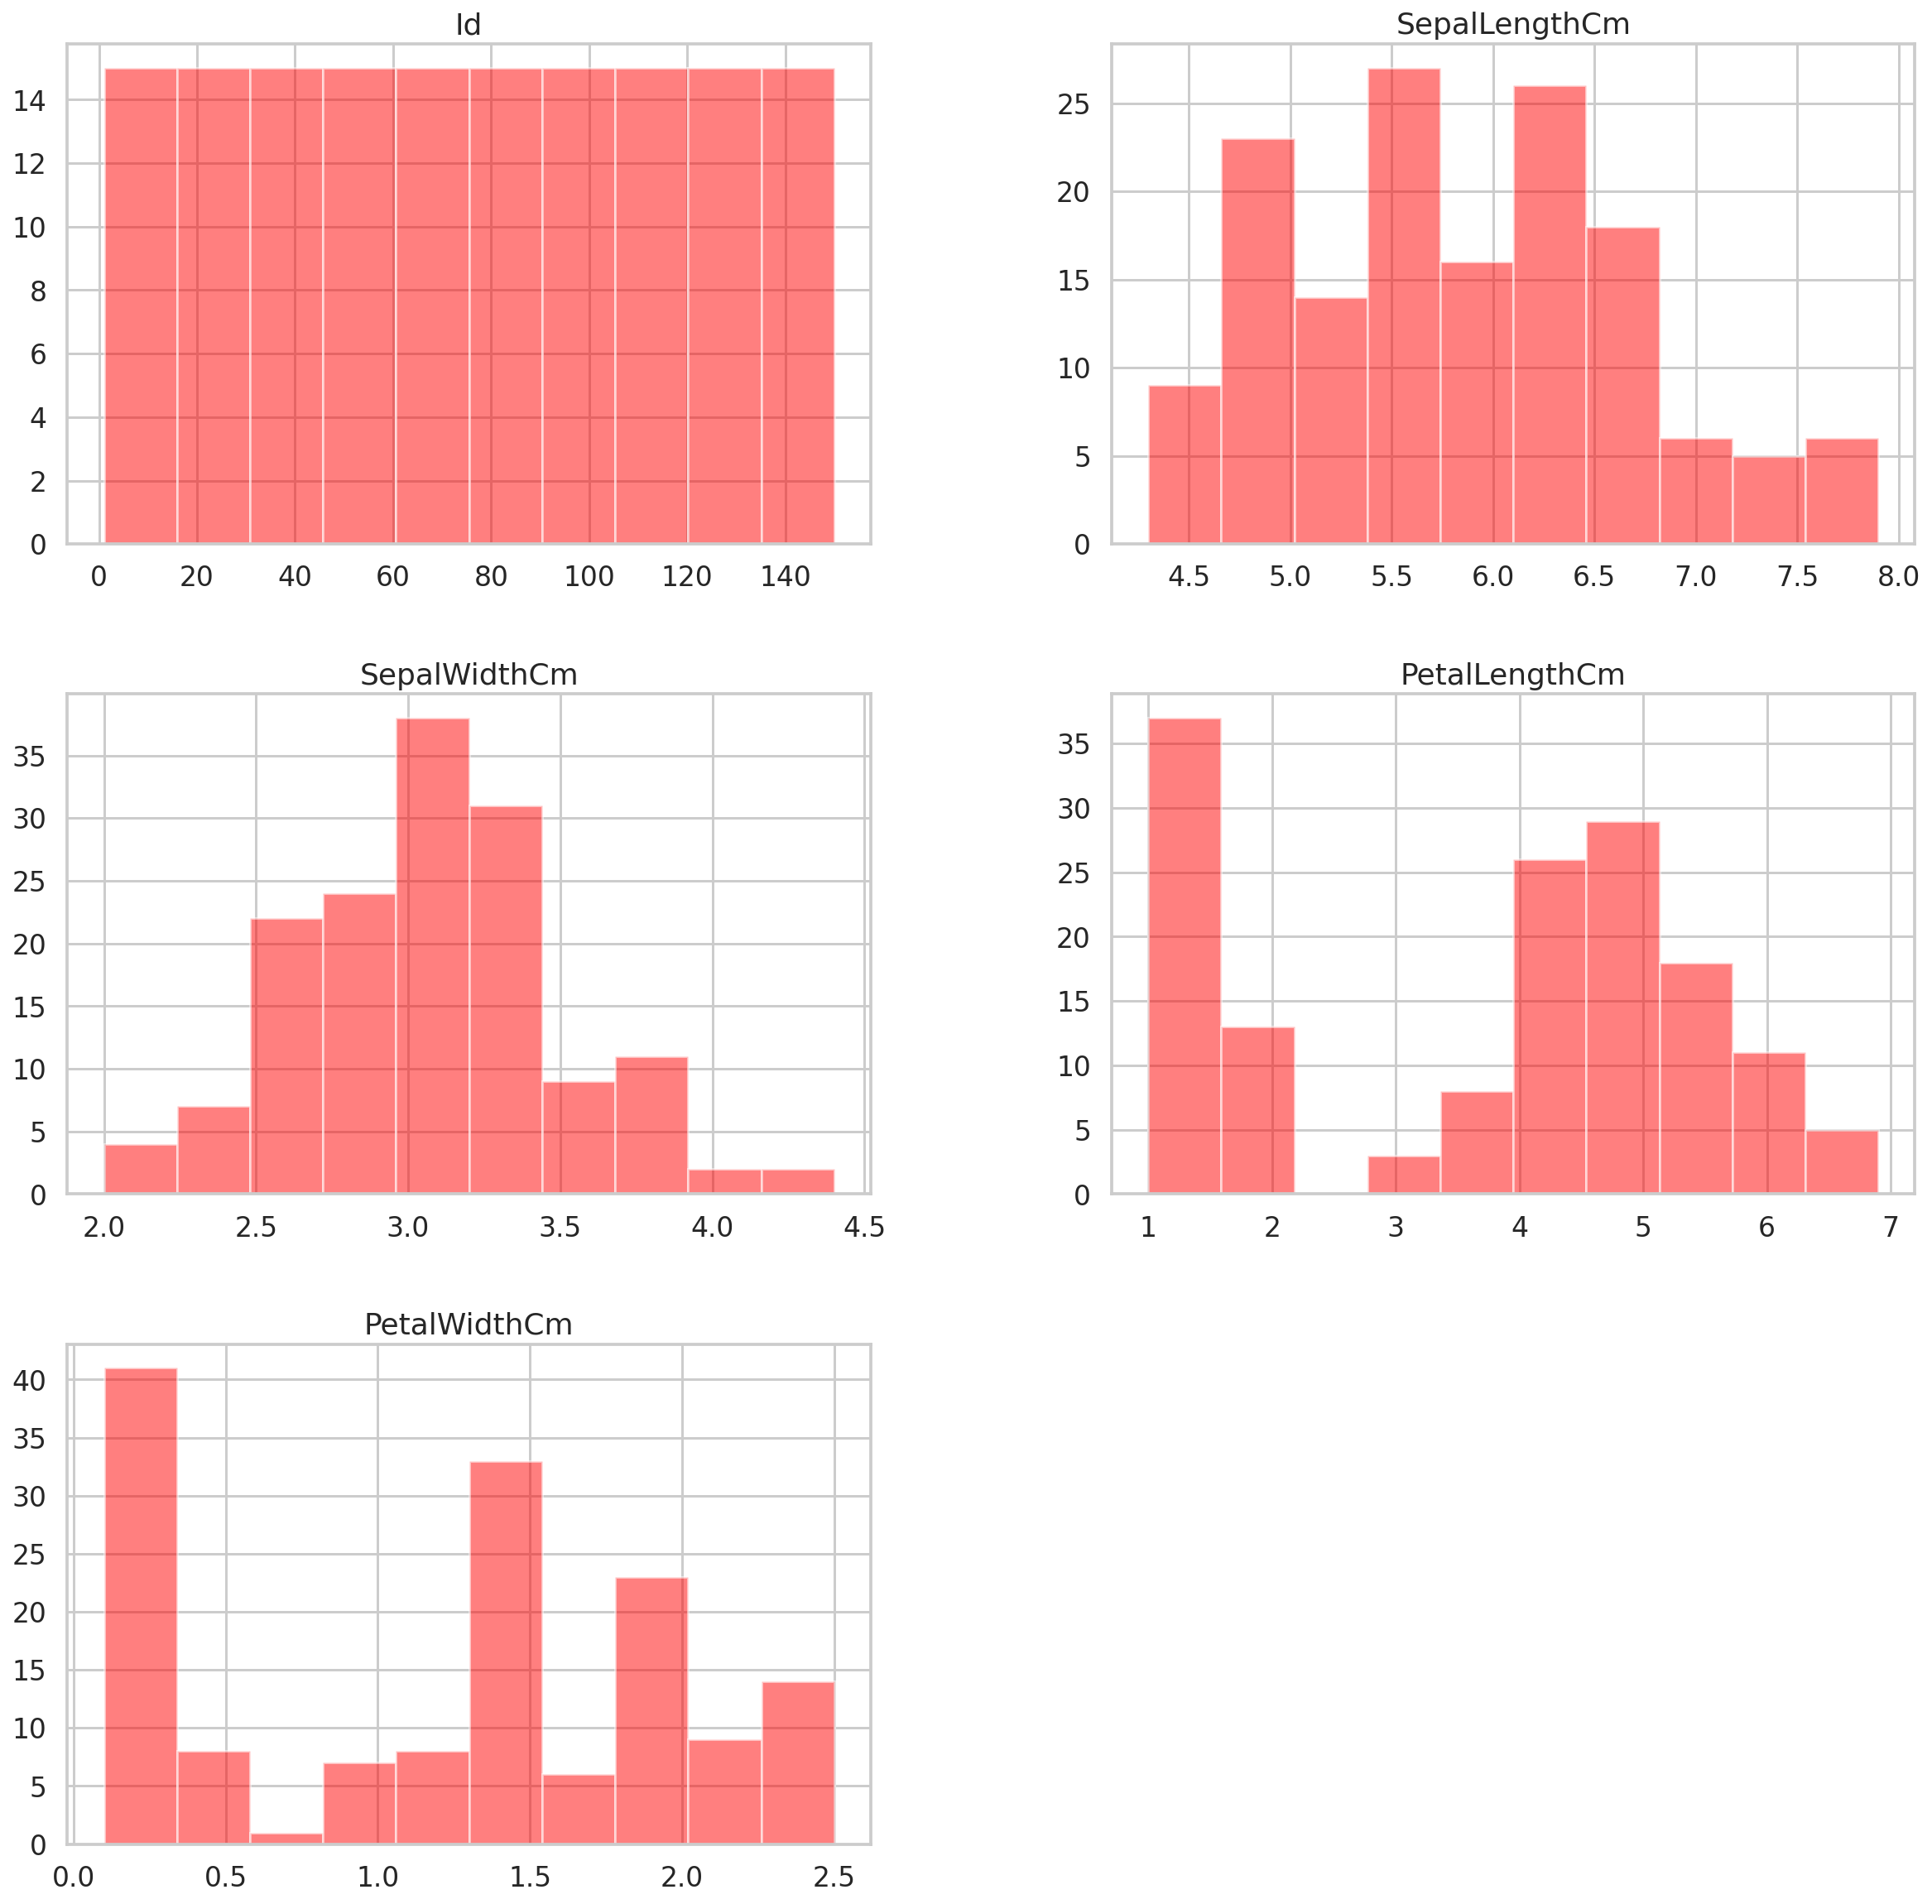

In [ ]:
dataset.hist(alpha=0.5, figsize=(20, 20), color='red')
plt.show()

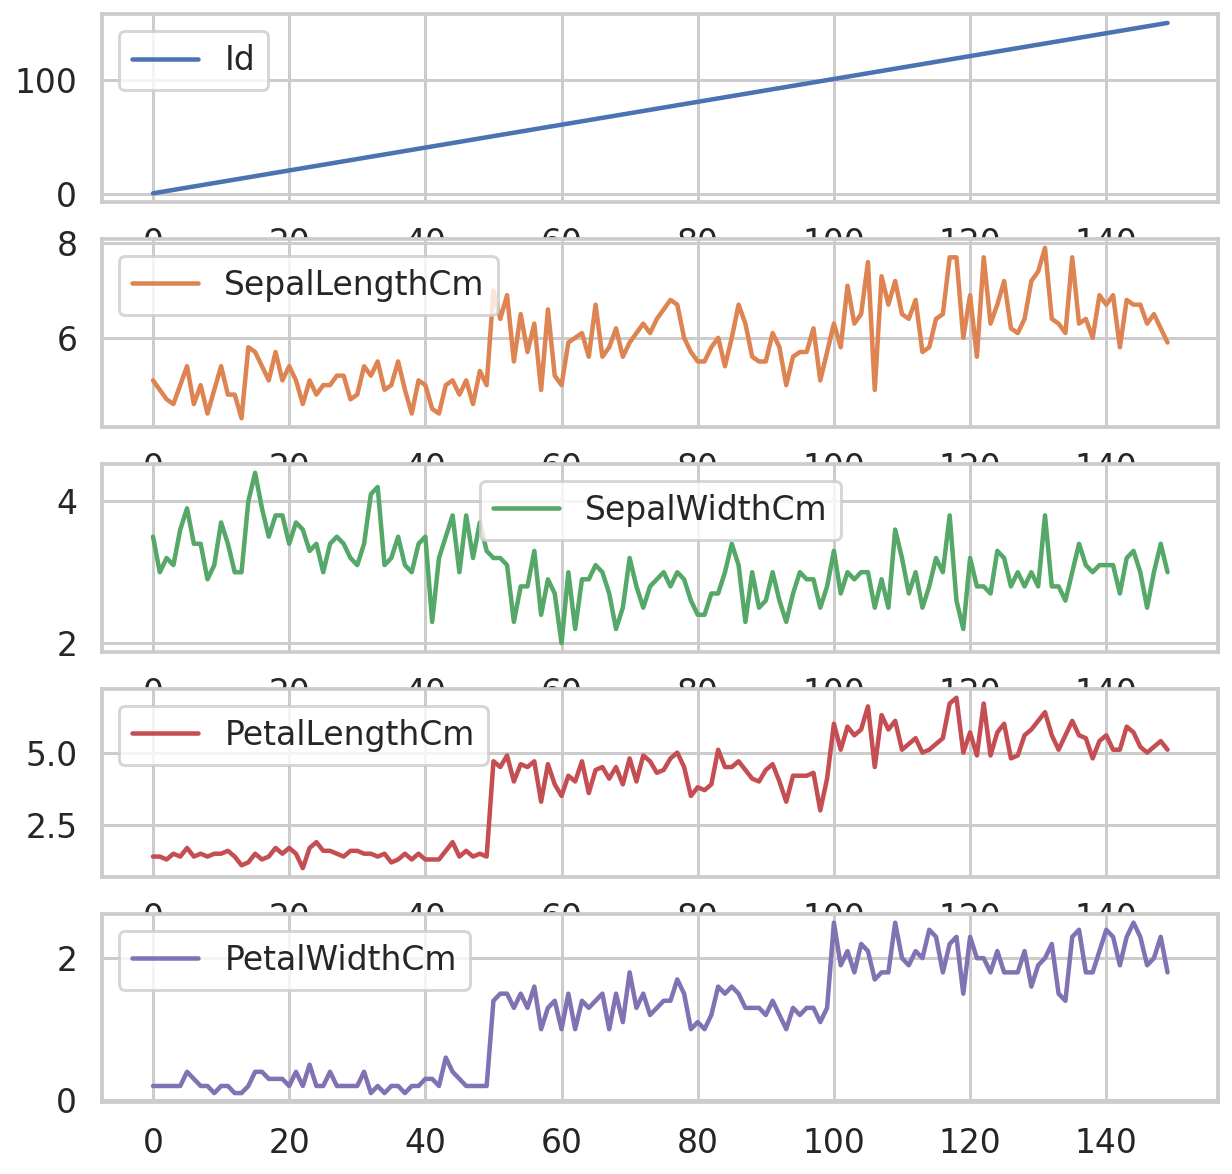

In [ ]:
dataset.plot(subplots=True, figsize=(10, 10), sharex=False, sharey=False)
plt.show()

## **2.3 Pembagian Data**

In [ ]:
random.seed(123)

def separate_data():
    A = iris_dataset[0:40]
    tA = iris_dataset[40:50]
    B = iris_dataset[50:90]
    tB = iris_dataset[90:100]
    C = iris_dataset[100:140]
    tC = iris_dataset[140:150]
    train = np.concatenate((A,B,C))
    test =  np.concatenate((tA,tB,tC))
    return train,test

train_porcent = 80 # Porcent Training
test_porcent = 20 # Porcent Test
iris_dataset = np.column_stack((iris_data.data,iris_data.target.T)) #Join X and Y
iris_dataset = list(iris_dataset)
random.shuffle(iris_dataset)

Filetrain, Filetest = separate_data()

train_X = np.array([i[:4] for i in Filetrain])
train_y = np.array([i[4] for i in Filetrain])
test_X = np.array([i[:4] for i in Filetest])
test_y = np.array([i[4] for i in Filetest])

### **2.3.1 Plotting Pembagian Data Training**

Text(0, 0.5, 'petal width (cm)')

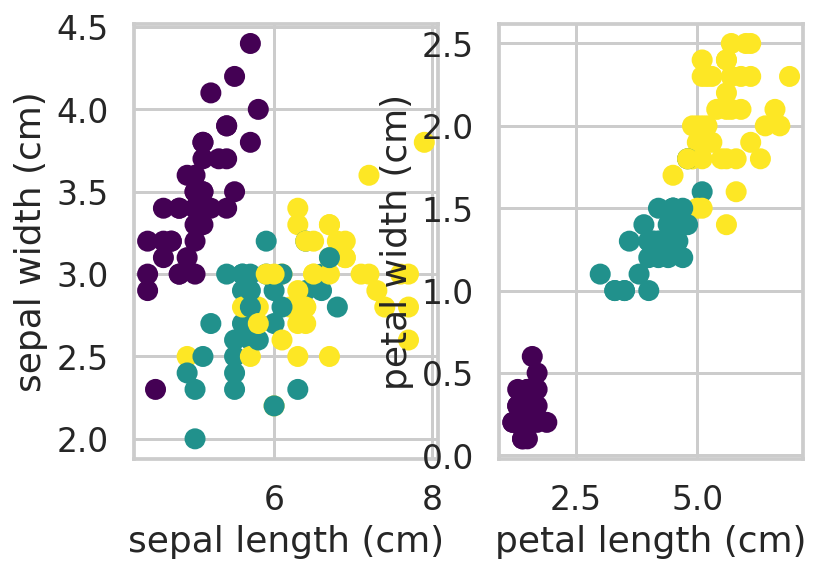

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


plt.subplot(1, 2, 1)
plt.scatter(train_X[:,0],train_X[:,1],c=train_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])

plt.subplot(1, 2, 2)
plt.scatter(train_X[:,2],train_X[:,3],c=train_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[2])
plt.ylabel(iris_data.feature_names[3])

### **2.3.2 Plotting Pembagian Data Testing**

Text(0, 0.5, 'petal width (cm)')

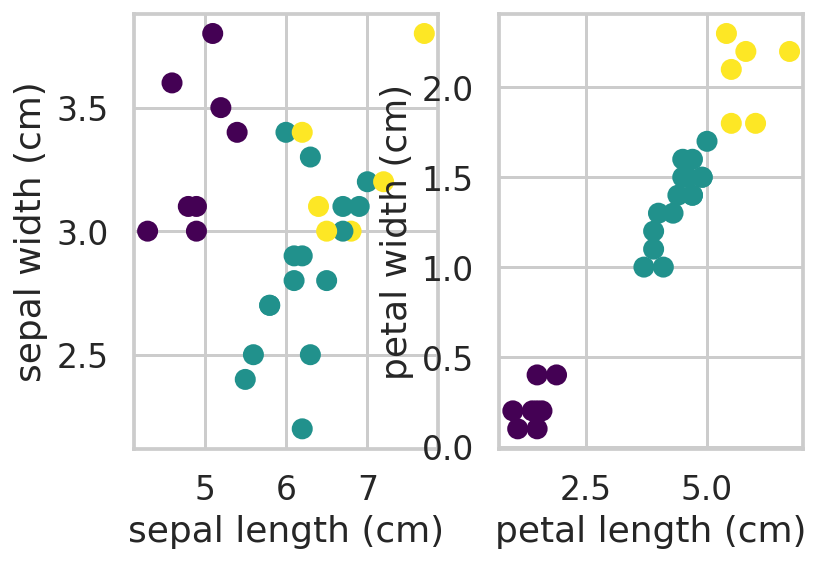

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(test_X[:,0],test_X[:,1],c=test_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])

plt.subplot(1, 2, 2)
plt.scatter(test_X[:,2],test_X[:,3],c=test_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[2])
plt.ylabel(iris_data.feature_names[3])

## **2.4 IMPLEMENTASI MLP**

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
import random

class MultiLayerPerceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, parameter=None):
        if (parameter == None):
            self.inputLayer = 4                        # Input Layer
            self.hiddenLayer = 5                       # Hidden Layer
            self.outputLayer = 3                       # Outpuy Layer
            self.learningRate = 0.005                  # Learning rate
            self.max_epochs = 600                      # Epochs
            self.iasHiddenValue = -1                   # Bias HiddenLayer
            self.BiasOutputValue = -1                  # Bias OutputLayer
            self.activation = self.ativacao['sigmoid'] # Activation function
            self.deriv = self.derivada['sigmoid']
        else:
            self.inputLayer = parameter['InputLayer']
            self.hiddenLayer = parameter['HiddenLayer']
            self.OutputLayer = parameter['OutputLayer']
            self.learningRate = parameter['LearningRate']
            self.max_epochs = parameter['Epocas']
            self.BiasHiddenValue = parameter['BiasHiddenValue']
            self.BiasOutputValue = parameter['BiasOutputValue']
            self.activation = self.ativacao[parameter['ActivationFunction']]
            self.deriv = self.derivada[parameter['ActivationFunction']]

        'Starting Bias and Weights'
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = 3

    pass

    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]

    ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
               }
    derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0))
               }

    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        'Stage 1 - Error: OutputLayer'
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))

        arrayStore = []
        'Stage 2 - Update weights OutputLayer and HiddenLayer'
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])

        'Stage 3 - Error: HiddenLayer'
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)

        'Stage 4 - Update weights HiddenLayer and InputLayer(x)'
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])

    def show_err_graphic(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()

    def predict(self, X, y):
        'Returns the predictions for every element of X'
        my_predictions = []
        'Forward Propagation'
        forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output

        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])

        array_score = []
        for i in range(len(my_predictions)):
            if my_predictions[i] == 0:
                array_score.append([i, 'Iris-setosa', my_predictions[i], y[i]])
            elif my_predictions[i] == 1:
                 array_score.append([i, 'Iris-versicolour', my_predictions[i], y[i]])
            elif my_predictions[i] == 2:
                 array_score.append([i, 'Iris-virginica', my_predictions[i], y[i]])

        dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'output', 'hoped_output'])
        return my_predictions, dataframe

    def fit(self, X, y):
        count_epoch = 1
        total_error = 0
        n = len(X);
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X):
                self.output = np.zeros(self.classes_number)
                'Stage 1 - (Forward Propagation)'
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                'Stage 2 - One-Hot-Encoding'
                if(y[idx] == 0):
                    self.output = np.array([1,0,0]) #Class1 {1,0,0}
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0]) #Class2 {0,1,0}
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1]) #Class3 {0,0,1}

                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error

                'Backpropagation : Update Weights'
                self.Backpropagation_Algorithm(inputs)

            total_error = (total_error / n)
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)

            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)


            count_epoch += 1
        self.show_err_graphic(error_array,epoch_array)

        plt.plot(W0[0])
        plt.title('Weight Hidden update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3', 'neuron4', 'neuron5'])
        plt.ylabel('Value Weight')
        plt.show()

        plt.plot(W1[0])
        plt.title('Weight Output update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3'])
        plt.ylabel('Value Weight')
        plt.show()

        return self

In [ ]:
def show_test():
    ep1 = [0,100,200,300,400,500,600,700,800,900,1000,1500,2000]
    h_5 = [0,60,70,70,83.3,93.3,96.7,86.7,86.7,76.7,73.3,66.7,66.7]
    h_4 = [0,40,70,63.3,66.7,70,70,70,70,66.7,66.7,43.3,33.3]
    h_3 = [0,46.7,76.7,80,76.7,76.7,76.6,73.3,73.3,73.3,73.3,76.7,76.7]
    plt.figure(figsize=(10,4))
    l1, = plt.plot(ep1, h_3, "--",color='b',label="node-3", marker=11)
    l2, = plt.plot(ep1, h_4, "--",color='g',label="node-4", marker=8)
    l3, = plt.plot(ep1, h_5, "--",color='r',label="node-5", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("number of Epochs")
    plt.ylabel("% Hits")
    plt.title("Number of Hidden Layers - Performance")

    ep2 = [0,100,200,300,400,500,600,700]
    tanh = [0.18,0.027,0.025,0.022,0.0068,0.0060,0.0057,0.00561]
    sigm = [0.185,0.0897,0.060,0.0396,0.0343,0.0314,0.0296,0.0281]
    Relu = [0.185,0.05141,0.05130,0.05127,0.05124,0.05123,0.05122,0.05121]
    plt.figure(figsize=(10,4))
    l1 , = plt.plot(ep2, tanh, "--",color='b',label="Hyperbolic Tangent",marker=11)
    l2 , = plt.plot(ep2, sigm, "--",color='g',label="Sigmoide", marker=8)
    l3 , = plt.plot(ep2, Relu, "--",color='r',label="ReLu", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.title("Activation Functions - Performance")

    fig, ax = plt.subplots()
    names = ["Hyperbolic Tangent","Sigmoide","ReLU"]
    x1 = [2.0,4.0,6.0]
    plt.bar(x1[0], 53.4,0.4,color='b')
    plt.bar(x1[1], 96.7,0.4,color='g')
    plt.bar(x1[2], 33.2,0.4,color='r')
    plt.xticks(x1,names)
    plt.ylabel('% Hits')
    plt.title('Hits - Activation Functions')
    plt.show()

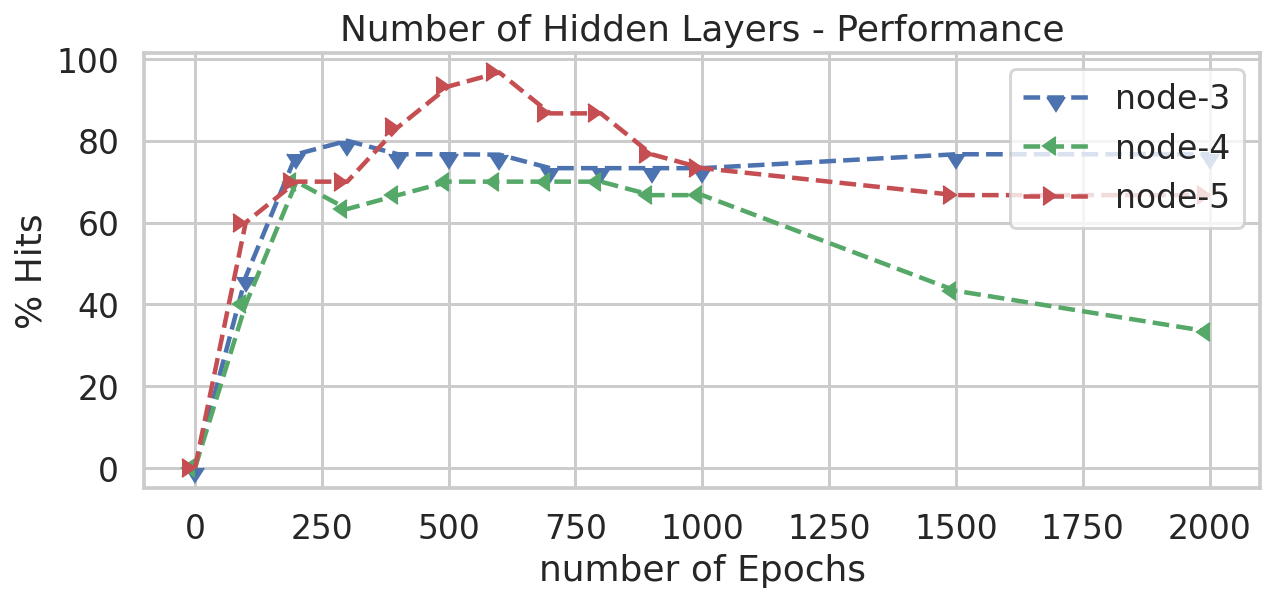

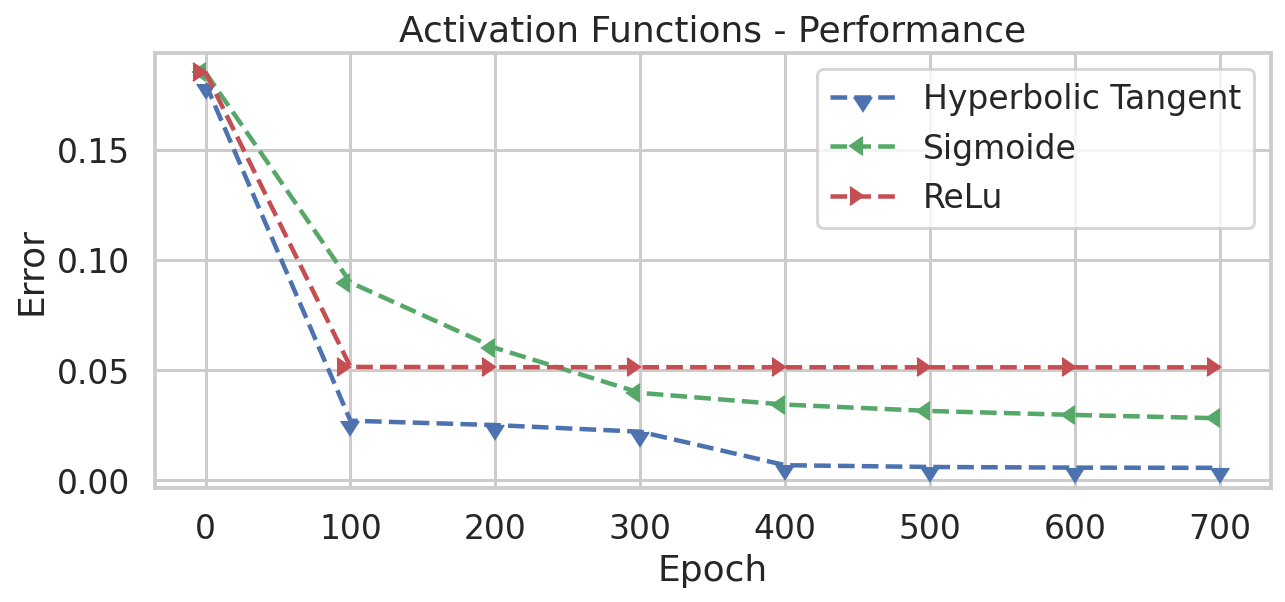

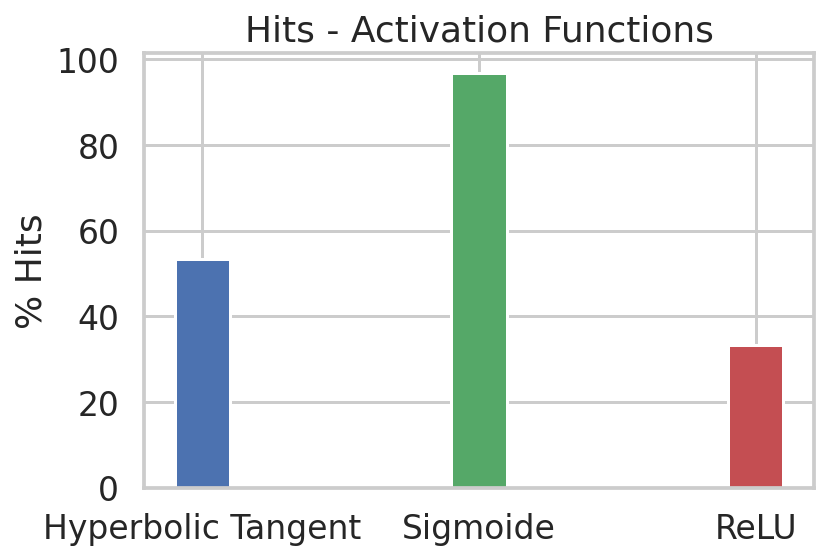

In [ ]:
show_test()

# TRAINING MLP

## Training MLP

Epoch  1 - Total Error:  0.08939914265311076
Epoch  50 - Total Error:  0.05376852115527734
Epoch  100 - Total Error:  0.03773105860576401
Epoch  150 - Total Error:  0.031164450497282094
Epoch  200 - Total Error:  0.028406909135682057
Epoch  250 - Total Error:  0.026692561942141566
Epoch  300 - Total Error:  0.02524003405939521
Epoch  350 - Total Error:  0.02384525367109565
Epoch  400 - Total Error:  0.022427464754471375
Epoch  450 - Total Error:  0.02094841588662415
Epoch  500 - Total Error:  0.01936513137210059
Epoch  550 - Total Error:  0.01759742449392902
Epoch  600 - Total Error:  0.0157921705956492
Epoch  650 - Total Error:  0.014194648016335649
Epoch  700 - Total Error:  0.012855583329293792


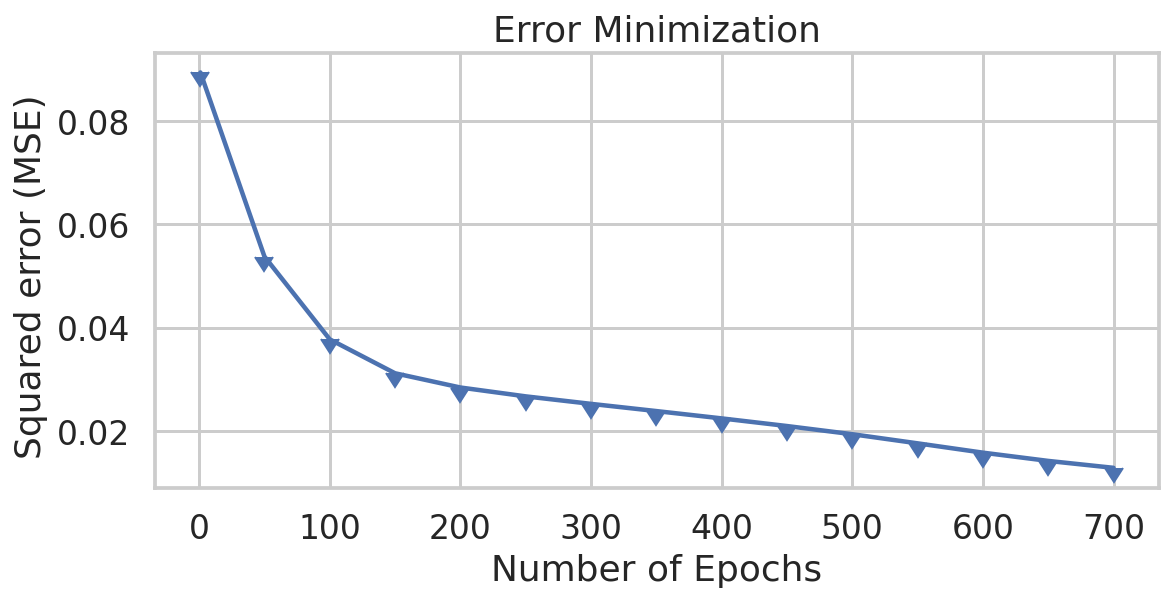

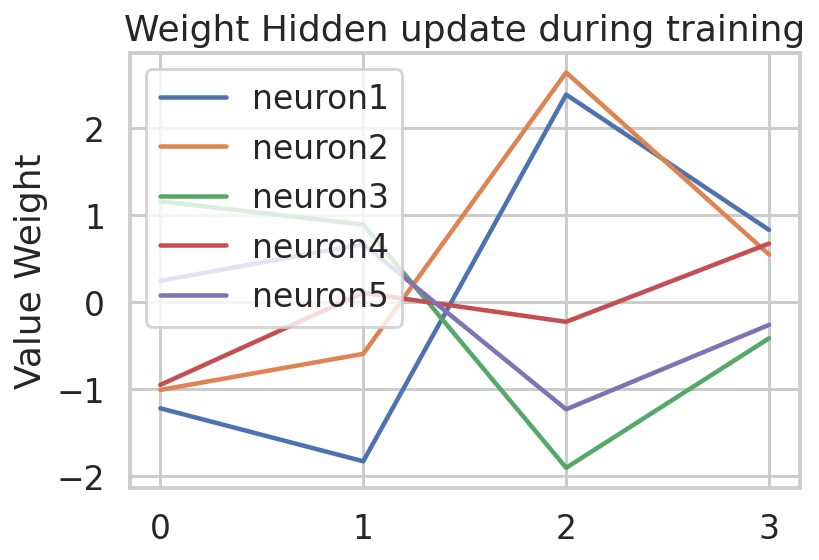

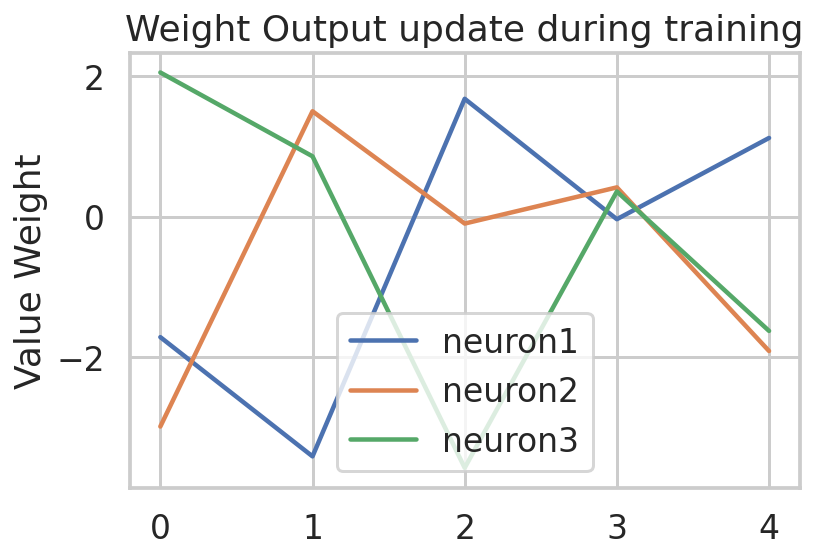

AttributeError: ignored

AttributeError: ignored

In [ ]:
dictionary = {'InputLayer':4, 'HiddenLayer':5, 'OutputLayer':3,
              'Epocas':700, 'LearningRate':0.005,'BiasHiddenValue':-1,
              'BiasOutputValue':-1, 'ActivationFunction':'sigmoid'}

Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(train_X,train_y)

## Testing MLP

In [ ]:
prev, dataframe = Perceptron.predict(test_X, test_y)
hits = n_set = n_vers = n_virg = 0
score_set = score_vers = score_virg = 0
for j in range(len(test_y)):
    if(test_y[j] == 0): n_set += 1
    elif(test_y[j] == 1): n_vers += 1
    elif(test_y[j] == 2): n_virg += 1

for i in range(len(test_y)):
    if test_y[i] == prev[i]:
        hits += 1
    if test_y[i] == prev[i] and test_y[i] == 0:
        score_set += 1
    elif test_y[i] == prev[i] and test_y[i] == 1:
        score_vers += 1
    elif test_y[i] == prev[i] and test_y[i] == 2:
        score_virg += 1

hits = (hits / len(test_y)) * 100
faults = 100 - hits

In [ ]:
dataframe

,_id,class,output,hoped_output
0,0,Iris-setosa,0,0.0
1,1,Iris-versicolour,1,1.0
2,2,Iris-versicolour,1,1.0
3,3,Iris-setosa,0,0.0
4,4,Iris-versicolour,1,1.0
5,5,Iris-versicolour,1,1.0
6,6,Iris-versicolour,1,1.0
7,7,Iris-versicolour,1,1.0
8,8,Iris-setosa,0,0.0
9,9,Iris-virginica,2,2.0


## Plotting Accuracy and precision the Multilayer Perceptron

Porcents : 96.67 % hits and 3.33 % faults
Total samples of test 150
*Iris-Setosa: 8 samples
*Iris-Versicolour: 16 samples
*Iris-Virginica: 6 samples


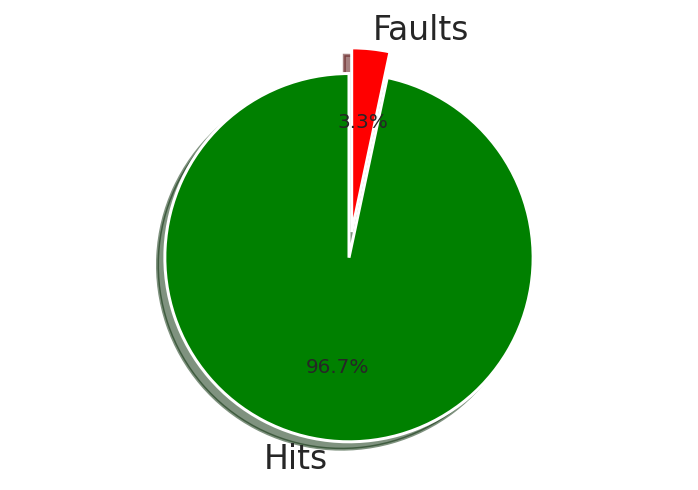

In [ ]:
graph_hits = []
print("Porcents :","%.2f"%(hits),"% hits","and","%.2f"%(faults),"% faults")
print("Total samples of test",n_samples)
print("*Iris-Setosa:",n_set,"samples")
print("*Iris-Versicolour:",n_vers,"samples")
print("*Iris-Virginica:",n_virg,"samples")

graph_hits.append(hits)
graph_hits.append(faults)
labels = 'Hits', 'Faults';
sizes = [96.5, 3.3]
explode = (0, 0.14)

fig1, ax1 = plt.subplots();
ax1.pie(graph_hits, explode=explode,colors=['green','red'],labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

## Score untuk masing-masing sampel

- Acurracy Iris-Setosa: 100.00 %
- Acurracy Iris-Versicolour: 93.75 %
- Acurracy Iris-Virginica: 100.00 %


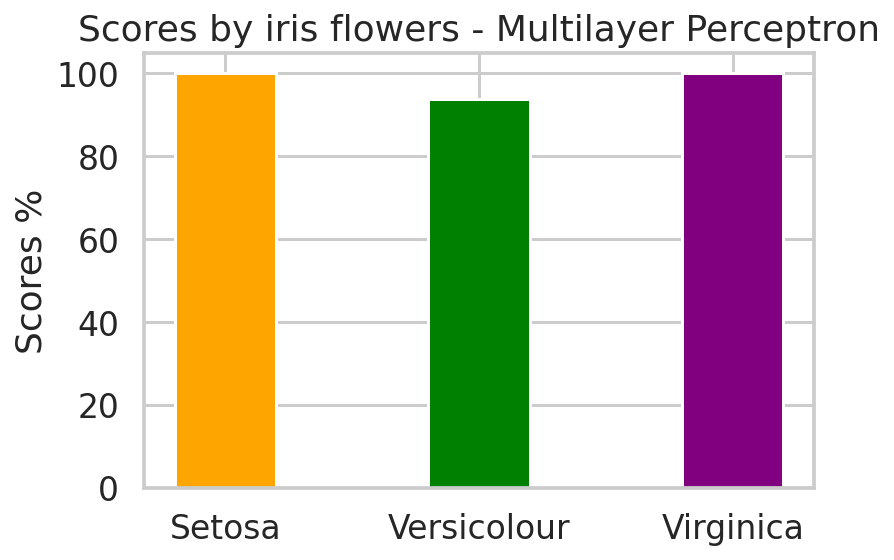

In [ ]:
acc_set = (score_set/n_set)*100
acc_vers = (score_vers/n_vers)*100
acc_virg = (score_virg/n_virg)*100
print("- Acurracy Iris-Setosa:","%.2f"%acc_set, "%")
print("- Acurracy Iris-Versicolour:","%.2f"%acc_vers, "%")
print("- Acurracy Iris-Virginica:","%.2f"%acc_virg, "%")
names = ["Setosa","Versicolour","Virginica"]
x1 = [2.0,4.0,6.0]
fig, ax = plt.subplots()
r1 = plt.bar(x1[0], acc_set,color='orange',label='Iris-Setosa')
r2 = plt.bar(x1[1], acc_vers,color='green',label='Iris-Versicolour')
r3 = plt.bar(x1[2], acc_virg,color='purple',label='Iris-Virginica')
plt.ylabel('Scores %')
plt.xticks(x1, names);plt.title('Scores by iris flowers - Multilayer Perceptron')
plt.show()

# FULL LIBRARY

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier
import pandas as pd


In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data
y = iris.target

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
y_train

array([[5.4, 3. , 4.5, 1.5],
       [6.2, 2.8, 4.8, 1.8],
       [6. , 3.4, 4.5, 1.6],
       [5.7, 4.4, 1.5, 0.4],
       [6.3, 2.9, 5.6, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [5.4, 3.9, 1.3, 0.4],
       [5.8, 2.7, 3.9, 1.2],
       [7.2, 3. , 5.8, 1.6],
       [5.2, 4.1, 1.5, 0.1],
       [7.7, 3.8, 6.7, 2.2],
       [6.5, 3. , 5.8, 2.2],
       [4.6, 3.6, 1. , 0.2],
       [6.7, 3.1, 4.7, 1.5],
       [6.3, 2.7, 4.9, 1.8],
       [5.5, 3.5, 1.3, 0.2],
       [6.5, 3. , 5.5, 1.8],
       [4.3, 3. , 1.1, 0.1],
       [7.7, 2.6, 6.9, 2.3],
       [4.8, 3.4, 1.9, 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 2.7, 3.9, 1.4],
       [6.3, 3.3, 4.7, 1.6],
       [7.6, 3. , 6.6, 2.1],
       [5.5, 2.6, 4.4, 1.2],
       [4.9, 2.4, 3.3, 1. ],
       [6.4, 3.2, 5.3, 2.3],
       [6.8, 2.8, 4.8, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6.5, 3.2, 5.1, 2. ]])

In [ ]:
y_test

array([1, 2, 1, 0, 2, 2, 0, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1,
       1, 2, 1, 1, 2, 1, 2, 2])

In [ ]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [ ]:
train_labels

array([[[0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0.,

In [ ]:
network = models.Sequential()
network.add(layers.Dense(32, activation='relu', input_shape=(4,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(3, activation='softmax'))

In [ ]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(X_train, train_labels, epochs=20, batch_size=40)

In [ ]:
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

# SKELEARN

In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)

In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1)

In [ ]:
prediction = clf.predict(X_test)
print(prediction)

[2 0 1 1 1 0 2 2 2 1 0 1 2 1 2 1 2 1 1 2 1 2 1 0 2 2 1 0 2 1]


In [ ]:
print(y_test)

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]


In [ ]:
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the Multi-layer Perceptron is: 0.7666666666666667


# KERAS

In [ ]:
mymodel = models.Sequential()
mymodel.add(layers.Dense(32, activation='relu', input_shape=(4,)))
mymodel.add(layers.Dense(64, activation='relu'))
mymodel.add(layers.Dense(128, activation='relu'))
mymodel.add(layers.Dense(3, activation='softmax'))

In [ ]:
mymodel.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
mymodel.fit(X_train, train_labels, epochs=20, batch_size=40)

Epoch 1/20
3/3 [==============================] - 1s 5ms/step - loss: 1.1119 - accuracy: 0.2833
Epoch 2/20
3/3 [==============================] - 0s 6ms/step - loss: 0.9877 - accuracy: 0.3000
Epoch 3/20
3/3 [==============================] - 0s 4ms/step - loss: 0.9321 - accuracy: 0.5417
Epoch 4/20
3/3 [==============================] - 0s 6ms/step - loss: 0.8915 - accuracy: 0.6917
Epoch 5/20
3/3 [==============================] - 0s 5ms/step - loss: 0.8560 - accuracy: 0.8333
Epoch 6/20
3/3 [==============================] - 0s 7ms/step - loss: 0.8354 - accuracy: 0.6667
Epoch 7/20
3/3 [==============================] - 0s 10ms/step - loss: 0.7926 - accuracy: 0.7000
Epoch 8/20
3/3 [==============================] - 0s 5ms/step - loss: 0.7657 - accuracy: 0.7917
Epoch 9/20
3/3 [==============================] - 0s 5ms/step - loss: 0.7410 - accuracy: 0.6667
Epoch 10/20
3/3 [==============================] - 0s 4ms/step - loss: 0.7215 - accuracy: 0.8500
Epoch 11/20
3/3 [=====================

In [ ]:
test_loss, test_acc = mymodel.evaluate(X_test, test_labels)
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

1/1 [==============================] - 0s 188ms/step - loss: 0.5737 - accuracy: 0.8333
Test Accuracy:  0.8333333134651184 
Test Loss:  0.5737436413764954
